In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'
#Imports

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import validation_curve, learning_curve
import graphviz

C:\Users\prapa\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Global = pd.read_csv("./datasets/GlobalDataset2017.csv")

In [4]:
Global.count()

yearOfRegistration                        47102
Datasource                                47102
gender                                    47102
ageBroad                                  47102
majorityStatus                            47102
majorityStatusAtExploit                   47102
majorityEntry                             47102
citizenship                               47102
meansOfControlDebtBondage                 47102
meansOfControlTakesEarnings               47102
meansOfControlRestrictsFinancialAccess    47102
meansOfControlThreats                     47102
meansOfControlPsychologicalAbuse          47102
meansOfControlPhysicalAbuse               47102
meansOfControlSexualAbuse                 47102
meansOfControlFalsePromises               47102
meansOfControlPsychoactiveSubstances      47102
meansOfControlRestrictsMovement           47102
meansOfControlRestrictsMedicalCare        47102
meansOfControlExcessiveWorkingHours       47102
meansOfControlUsesChildren              

In [41]:
Global.shape


(47102, 58)

In [5]:
# Subsetting data to only minor group#

Status = Global["majorityStatus"]

Minor_mask = Status  == "Minor"

MinorGlobal=Global.loc[Minor_mask]

In [44]:
MinorGlobal.shape

(8447, 58)

In [84]:
Global.describe()

yearOfRegistration  meansOfControlDebtBondage  \
count        47102.000000               47102.000000   
mean          2013.417519                 -96.864252   
std              3.934149                  14.457303   
min           2002.000000                 -99.000000   
25%           2012.000000                 -99.000000   
50%           2015.000000                 -99.000000   
75%           2016.000000                 -99.000000   
max           2017.000000                   1.000000   

       meansOfControlTakesEarnings  meansOfControlRestrictsFinancialAccess  \
count                 47102.000000                            47102.000000   
mean                    -94.225256                              -98.745234   
std                      21.323365                                5.041057   
min                     -99.000000                              -99.000000   
25%                     -99.000000                              -99.000000   
50%                     -99.000000                              -99.000000   
75%                     -99.000000                              -99.000000   
max                       1.000000                                1.000000   

       meansOfControlThreats  meansOfControlPsychologicalAbuse  \
count           47102.000000                      47102.000000   
mean              -93.212560                        -91.862299   
std                23.350827                         25.745629   
min               -99.000000                        -99.000000   
25%               -99.000000                        -99.000000   
50%               -99.000000                        -99.000000   
75%               -99.000000                        -99.000000   
max                 1.000000                          1.000000   

       meansOfControlPhysicalAbuse  meansOfControlSexualAbuse  \
count                 47102.000000               47102.000000   
mean                    -93.522526                 -96.978918   
std                      22.754246                  14.072005   
min                     -99.000000                 -99.000000   
25%                     -99.000000                 -99.000000   
50%                     -99.000000                 -99.000000   
75%                     -99.000000                 -99.000000   
max                       1.000000                   1.000000   

       meansOfControlFalsePromises  meansOfControlPsychoactiveSubstances  \
count                 47102.000000                          47102.000000   
mean                    -93.497049                            -96.125409   
std                      22.804028                             16.709269   
min                     -99.000000                            -99.000000   
25%                     -99.000000                            -99.000000   
50%                     -99.000000                            -99.000000   
75%                     -99.000000                            -99.000000   
max                       1.000000                              1.000000   

                 ...             typeOfSexProstitution  typeOfSexPornography  \
count            ...                      47102.000000          47102.000000   
mean             ...                        -58.940385            -85.839306   
std              ...                         48.698852             33.613207   
min              ...                        -99.000000            -99.000000   
25%              ...                        -99.000000            -99.000000   
50%              ...                        -99.000000            -99.000000   
75%              ...                          0.000000            -99.000000   
max              ...                          1.000000              1.000000   

       typeOfSexRemoteInteractiveServices  typeOfSexPrivateSexualServices  \
count                        47102.000000                    47102.000000   
mean                           -85.840495                 

In [6]:
MinorGlobal.head()

yearOfRegistration       Datasource  gender ageBroad majorityStatus  \
NaN                2012  Case Management  Female    9--17          Minor   
NaN                2012  Case Management    Male    9--17          Minor   
NaN                2012  Case Management  Female    9--17          Minor   
NaN                2012  Case Management  Female    9--17          Minor   
NaN                2012  Case Management  Female    9--17          Minor   

    majorityStatusAtExploit majorityEntry citizenship  \
NaN                     -99         Minor          HT   
NaN                     -99         Minor          HT   
NaN                     -99         Minor          HT   
NaN                     -99         Minor          HT   
NaN                     -99         Minor          HT   

     meansOfControlDebtBondage  meansOfControlTakesEarnings  \
NaN                        -99                          -99   
NaN                        -99                          -99   
NaN                        -99                          -99   
NaN                        -99                          -99   
NaN                        -99                          -99   

               ...             typeOfSexRemoteInteractiveServices  \
NaN            ...                                            -99   
NaN            ...                                            -99   
NaN            ...                                            -99   
NaN            ...                                            -99   
NaN            ...                                            -99   

     typeOfSexPrivateSexualServices  isAbduction  RecruiterRelationship  \
NaN                             -99            0        Family/Relative   
NaN                             -99            0                Unknown   
NaN                             -99            0                  Other   
NaN                             -99            0                  Other   
NaN                             -99            0                Unknown   

     CountryOfExploitation  recruiterRelationIntimatePartner  \
NaN                     HT                                 0   
NaN                     HT                                 0   
NaN                     HT                                 0   
NaN                     HT                                 0   
NaN                     HT                                 0   

     recruiterRelationFriend  recruiterRelationFamily  recruiterRelationOther  \
NaN                        0                        1                       0   
NaN                        0                        0                       0   
NaN                        0                        0                       1   
NaN                        0                        0                       1   
NaN                        0                        0                       0   

     recruiterRelationUnknown  
NaN                         0  
NaN                         1  
NaN                         0  
NaN                         0  
NaN                         1  

[5 rows x 58 columns]

In [ ]:
MinorGlobal.groupby

In [59]:
MinorGlobal.corr().apply(lambda x: x.sort_values(ascending=False))

yearOfRegistration  \
isAbduction                                      -0.422211   
isForcedLabour                                    0.175622   
isForcedMarriage                                 -0.467424   
isForcedMilitary                                 -0.472446   
isOrganRemoval                                   -0.472446   
isOtherExploit                                    0.218942   
isSexAndLabour                                    0.178643   
isSexualExploit                                   0.182515   
meansOfControlDebtBondage                         0.057405   
meansOfControlExcessiveWorkingHours              -0.013064   
meansOfControlFalsePromises                       0.036432   
meansOfControlNotSpecified                       -0.133867   
meansOfControlOther                               0.131367   
meansOfControlPhysicalAbuse                       0.120351   
meansOfControlPsychoactiveSubstances              0.174508   
meansOfControlPsychologicalAbuse                  0.168258   
meansOfControlRestrictsFinancialAccess            0.024413   
meansOfControlRestrictsMedicalCare                0.031462   
meansOfControlRestrictsMovement                   0.165712   
meansOfControlSexualAbuse                         0.164461   
meansOfControlTakesEarnings                       0.094127   
meansOfControlThreatOfLawEnforcement              0.040824   
meansOfControlThreats                             0.164885   
meansOfControlUsesChildren                        0.009645   
meansOfControlWithholdsDocuments                  0.022659   
meansOfControlWithholdsNecessities                0.085964   
recruiterRelationFamily                          -0.506271   
recruiterRelationFriend                          -0.506807   
recruiterRelationIntimatePartner                 -0.506560   
recruiterRelationOther                           -0.506778   
recruiterRelationUnknown                         -0.224606   
typeOfLabourAgriculture                           0.018530   
typeOfLabourAquafarming                           0.018530   
typeOfLabourBegging                               0.018505   
typeOfLabourConstruction                          0.018546   
typeOfLabourDomesticWork                          0.018429   
typeOfLabourHospitality                           0.008126   
typeOfLabourIllicitActivities                     0.018530   
typeOfLabourManufacturing                         0.018530   
typeOfLabourMiningOrDrilling                      0.018530   
typeOfLabourNotSpecified                          0.008437   
typeOfLabourOther                                 0.005089   
typeOfLabourPeddling                              0.018573   
typeOfLabourTransportation                        0.018530   
typeOfSexPornography                              0.435728   
typeOfSexPrivateSexualServices                    0.435725   
typeOfSexProstitution                            -0.184578   
typeOfSexRemoteInteractiveServices                0.435725   
yearOfRegistration                                1.000000   

                                        meansOfControlDebtBondage  \
isAbduction                                              0.007254   
isForcedLabour                                           0.064939   
isForcedMarriage                                        -0.029636   
isForcedMilitary                                        -0.029441   
isOrganRemoval                                          -0.029441   
isOtherExploit                                           0.064267   
isSexAndLabour                                           0.065107   
isSexualExploit                                          0.065446   
meansOfControlDebtBondage                                1.000000   
meansOfControlExcessiveWorkingHours                      0.012714   
meansOfControlFalsePromises                              0.013136   
meansOfControlNotSpecified                               0.001332   
meansOfControlOther                       

In [8]:
corr = MinorGlobal.corr()

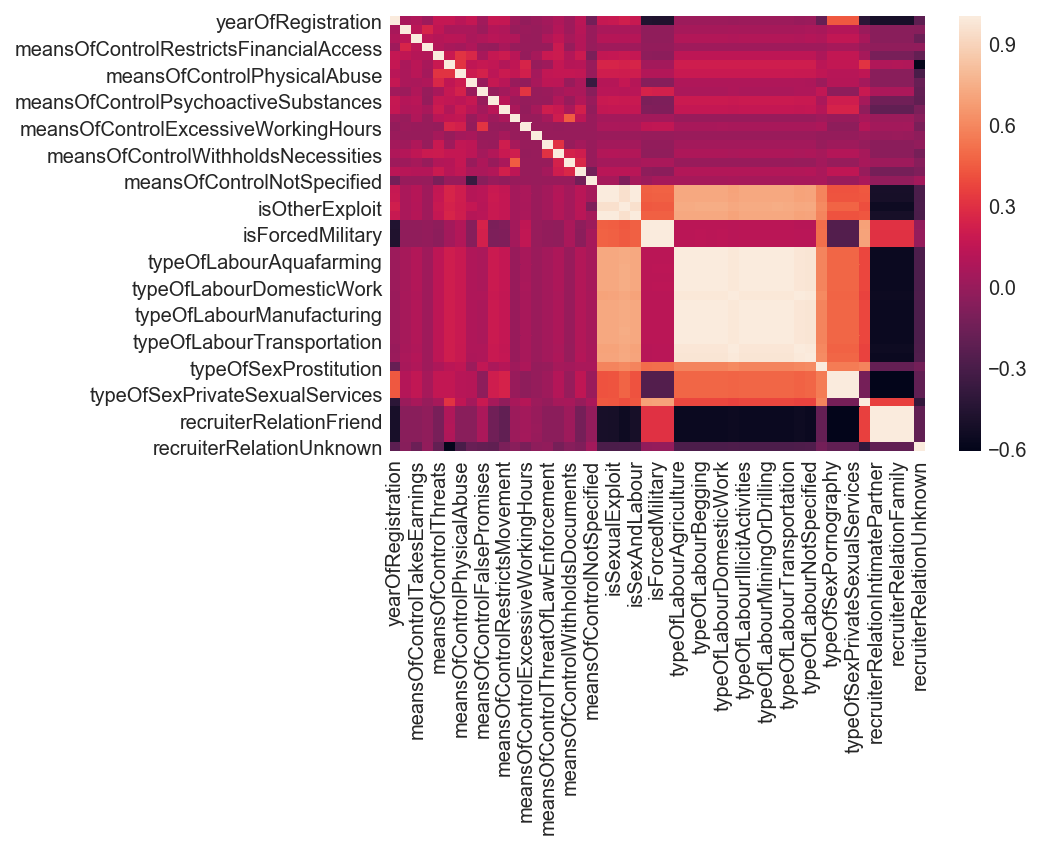

In [9]:
sns.heatmap(corr)

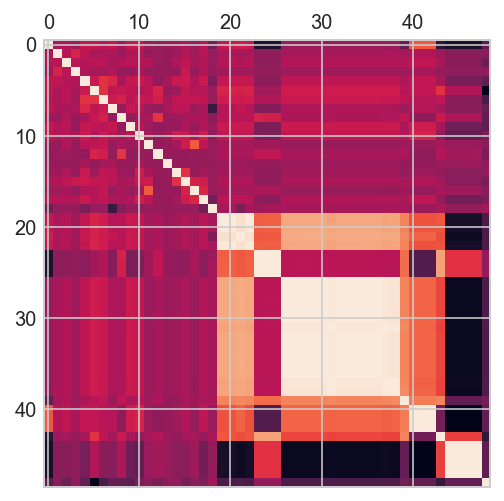

In [50]:
plt.matshow(corr)

[Text(0,0,u'None'),
 Text(0,0,u'yearOfRegistration'),
 Text(0,0,u'meansOfControlDebtBondage'),
 Text(0,0,u'meansOfControlTakesEarnings'),
 Text(0,0,u'meansOfControlRestrictsFinancialAccess'),
 Text(0,0,u'meansOfControlThreats'),
 Text(0,0,u'meansOfControlPsychologicalAbuse')]

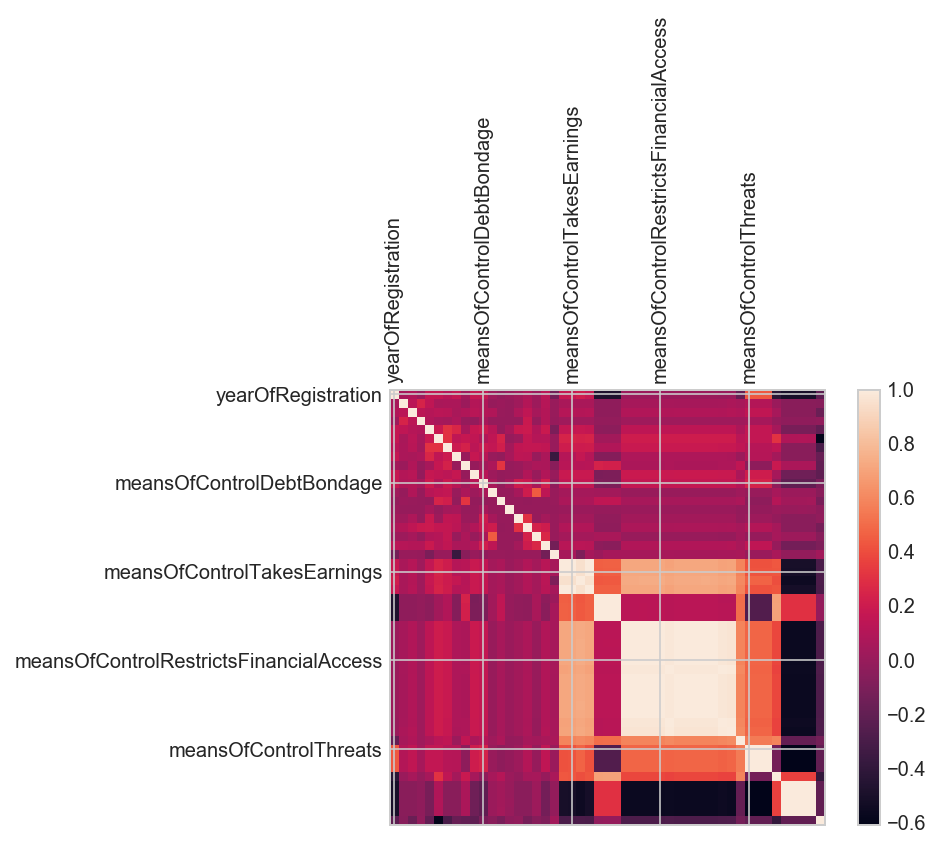

In [52]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

In [79]:
MinorGlobal.RecruiterRelationship.unique()


8447

In [80]:
MinorGlobal['RecruiterRelationship'].value_counts()

Unknown                              7568
Family/Relative                       288
Other                                 175
Intimate Partner                      175
-99                                   128
Friend                                 73
Friend; Other                          16
Family/Relative; Friend                 7
Friend; Intimate Partner                5
Intimate Partner; Other                 2
Family/Relative; Other                  2
Family/Relative; Intimate Partner       2
Family/Relative; Unknown                2
Family/Relative; Friend; Other          2
Friend; Intimate Partner; Other         1
Friend; Unknown                         1
Name: RecruiterRelationship, dtype: int64

In [81]:
MinorGlobal['recruiterRelationFamily'].value_counts()

 0     5828
-99    2316
 1      303
Name: recruiterRelationFamily, dtype: int64

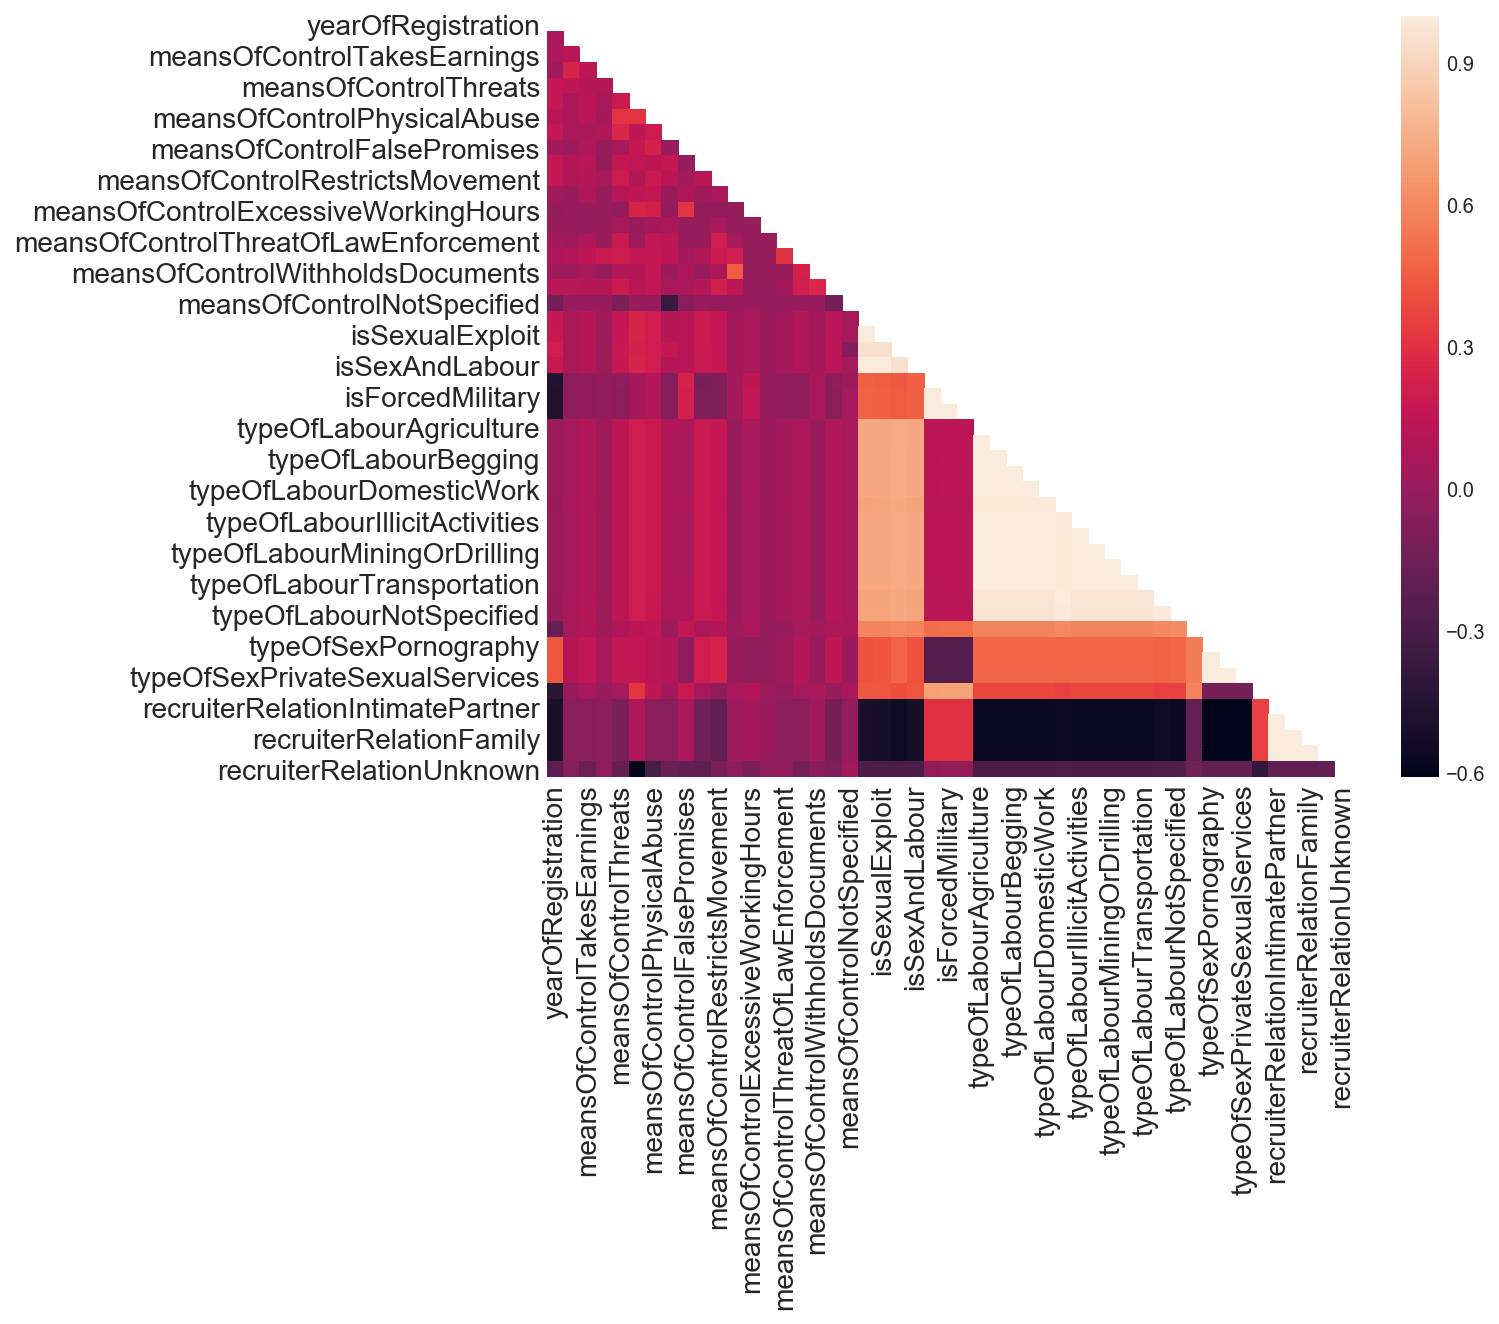

In [72]:
corr = MinorGlobal.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()